# Aggregations: Min, Max, and Everything In Between


Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.


## Summing the Values in an Array
As a quick example, consider computing the sum of all values in an array. Python itself can do this using the built-in `sum` function:

In [1]:
import numpy as np
L = np.random.random(100)
sum(L)

44.34689866246818

In [2]:
np.sum(L)

44.34689866246818

In [3]:
big_array = np.random.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

143 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.26 ms ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Minimum and Maximum

In [4]:
min(big_array), max(big_array)

(1.2464803295086924e-06, 0.9999989801248317)

In [5]:
np.min(big_array), np.max(big_array)

(1.2464803295086924e-06, 0.9999989801248317)

In [6]:
%timeit min(big_array)
%timeit np.min(big_array)

55.9 ms ± 500 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
448 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
print(big_array.min(), big_array.max(), big_array.sum())

1.2464803295086924e-06 0.9999989801248317 500041.9426250859


## Multi dimensional aggregates
One common type of aggregation operation is an aggregate along a row or column. Say you have some data stored in 2-D array.

In [8]:
M = np.random.random((3, 4))
print(M)

[[0.49910306 0.71482365 0.61442228 0.65418477]
 [0.00545499 0.2342466  0.61840152 0.3901275 ]
 [0.12711093 0.1576576  0.26164118 0.5632787 ]]


In [9]:
# By default, each NumPy aggregation
# function will return the aggregate over the entire array
M.sum()

4.840452786826891

In [10]:
# Minium value within each row axis=0
M.min(axis=0)

array([0.00545499, 0.1576576 , 0.26164118, 0.3901275 ])

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the heights of all US presidents. This data is available in the file president_heights.csv, which is a simple comma-separated list of labels and values:

In [15]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [16]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [17]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [18]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

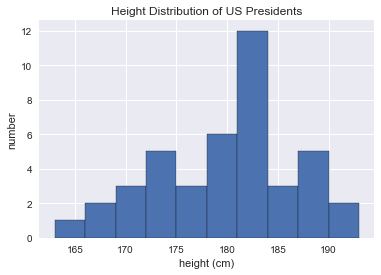

In [21]:
plt.hist(heights, edgecolor='black')
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');